<a href="https://colab.research.google.com/github/KunalDM1999/Task-8-Clustering-with-K-Means/blob/main/Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data handling and preprocessing**
**data finding**

In [84]:
%pip install opendatasets

**importing all importent imports**

In [85]:
# Data handling and preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Train-test split
from sklearn.model_selection import train_test_split

# K-Means clustering
from sklearn.cluster import KMeans

# Dimensionality reduction for visualization
from sklearn.decomposition import PCA

# Evaluation metrics
from sklearn.metrics import silhouette_score, accuracy_score, classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for visualizations
sns.set(style='whitegrid')
plt.style.use('ggplot')
import opendatasets as od
od.download('https://www.kaggle.com/datasets/jessemostipak/volcano-eruptions')

Skipping, found downloaded files in "./volcano-eruptions" (use force=True to force download)


**loading data**

In [86]:
data=pd.read_csv('/content/volcano-eruptions/volcano.csv')
data

,volcano_number,volcano_name,primary_volcano_type,last_eruption_year,country,region,subregion,latitude,longitude,elevation,...,major_rock_5,minor_rock_1,minor_rock_2,minor_rock_3,minor_rock_4,minor_rock_5,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
0,283001,Abu,Shield(s),-6850,Japan,"Japan, Taiwan, Marianas",Honshu,34.500,131.600,641,...,,,,,,,3597,9594,117805,4071152
1,355096,Acamarachi,Stratovolcano,Unknown,Chile,South America,"Northern Chile, Bolivia and Argentina",-23.292,-67.618,6023,...,,,,,,,0,7,294,9092
2,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,...,,Basalt / Picro-Basalt,,,,,4329,60730,1042836,7634778
3,213004,Acigol-Nevsehir,Caldera,-2080,Turkey,Mediterranean and Western Asia,Turkey,38.537,34.621,1683,...,,,,,,,127863,127863,218469,2253483
4,321040,Adams,Stratovolcano,950,United States,Canada and Western USA,USA (Washington),46.206,-121.490,3742,...,,Dacite,,,,,0,70,4019,393303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,300242,Zimina,Stratovolcano(es),Unknown,Russia,Kamchatka and Mainland Asia,Kamchatka Peninsula,55.862,160.603,3057,...,,,,,,,0,0,77,11184
954,341061,Zitacuaro-Valle de Bravo,Caldera,-3050,Mexico,México and Central America,Mexico,19.400,-100.250,3500,...,,Trachyandesite / Basaltic Trachyandesite,Trachybasalt / Tephrite Basanite,,,,231977,231977,490440,4838069
955,221020,Zubair Group,Shield,2013,Yemen,Africa and Red Sea,Africa (northeastern) and Red Sea,15.050,42.180,191,...,,,,,,,7,7,7,671171
956,221021,Zukur,Shield,Unknown,Yemen,Africa and Red Sea,Africa (northeastern) and Red Sea,14.020,42.750,624,...,,,,,,,508,922,1075,1472800


In [87]:
data.info()
print (data['country'].unique())
print (data['subregion'].unique())
print (data['region'].unique())
print (data['primary_volcano_type'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   volcano_number            958 non-null    int64  
 1   volcano_name              958 non-null    object 
 2   primary_volcano_type      958 non-null    object 
 3   last_eruption_year        958 non-null    object 
 4   country                   958 non-null    object 
 5   region                    958 non-null    object 
 6   subregion                 958 non-null    object 
 7   latitude                  958 non-null    float64
 8   longitude                 958 non-null    float64
 9   elevation                 958 non-null    int64  
 10  tectonic_settings         958 non-null    object 
 11  evidence_category         958 non-null    object 
 12  major_rock_1              958 non-null    object 
 13  major_rock_2              958 non-null    object 
 14  major_rock



**Feature Selection**

1. Included: All selected columns are continuous, numeric, and geographically relevant — ideal for clustering volcanoes by physical properties and population exposure.

2. Excluded: High-cardinality categorical features like country, region, subregion, primary_volcano_type, and tectonic_settings would require encoding, adding noise and dimensionality.

3. Avoided redundancy: Columns like volcano_number, volcano_name, and last_eruption_year are identifiers or inconsistent formats — not useful for clustering.


In [88]:
selected_columns = [
    'latitude',
    'longitude',
    'elevation',
    'population_within_5_km',
    'population_within_10_km',
    'population_within_30_km',
    'population_within_100_km'
]

df_kmeans = data[selected_columns]

print(df_kmeans.describe())
df_kmeans.head()

         latitude   longitude    elevation  population_within_5_km  \
count  958.000000  958.000000   958.000000            9.580000e+02   
mean    14.984680   23.537475  1867.027140            4.786046e+04   
std     31.584983  109.852596  1401.545901            2.986690e+05   
min    -78.500000 -179.970000 -2500.000000            0.000000e+00   
25%     -5.401500  -78.282750   881.000000            0.000000e+00   
50%     14.514000   36.393500  1622.500000            2.950000e+02   
75%     40.798250  131.045500  2548.250000            4.642000e+03   
max     71.082000  179.580000  6879.000000            5.783287e+06   

       population_within_10_km  population_within_30_km  \
count             9.580000e+02             9.580000e+02   
mean              6.121775e+04             3.040444e+05   
std               3.023860e+05             7.354221e+05   
min               0.000000e+00             0.000000e+00   
25%               2.325000e+01             4.080000e+02   
50%            

,latitude,longitude,elevation,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
0,34.500,131.600,641,3597,9594,117805,4071152
1,-23.292,-67.618,6023,0,7,294,9092
2,14.501,-90.876,3976,4329,60730,1042836,7634778
3,38.537,34.621,1683,127863,127863,218469,2253483
4,46.206,-121.490,3742,0,70,4019,393303


**Distribution Plot and Box Plot**

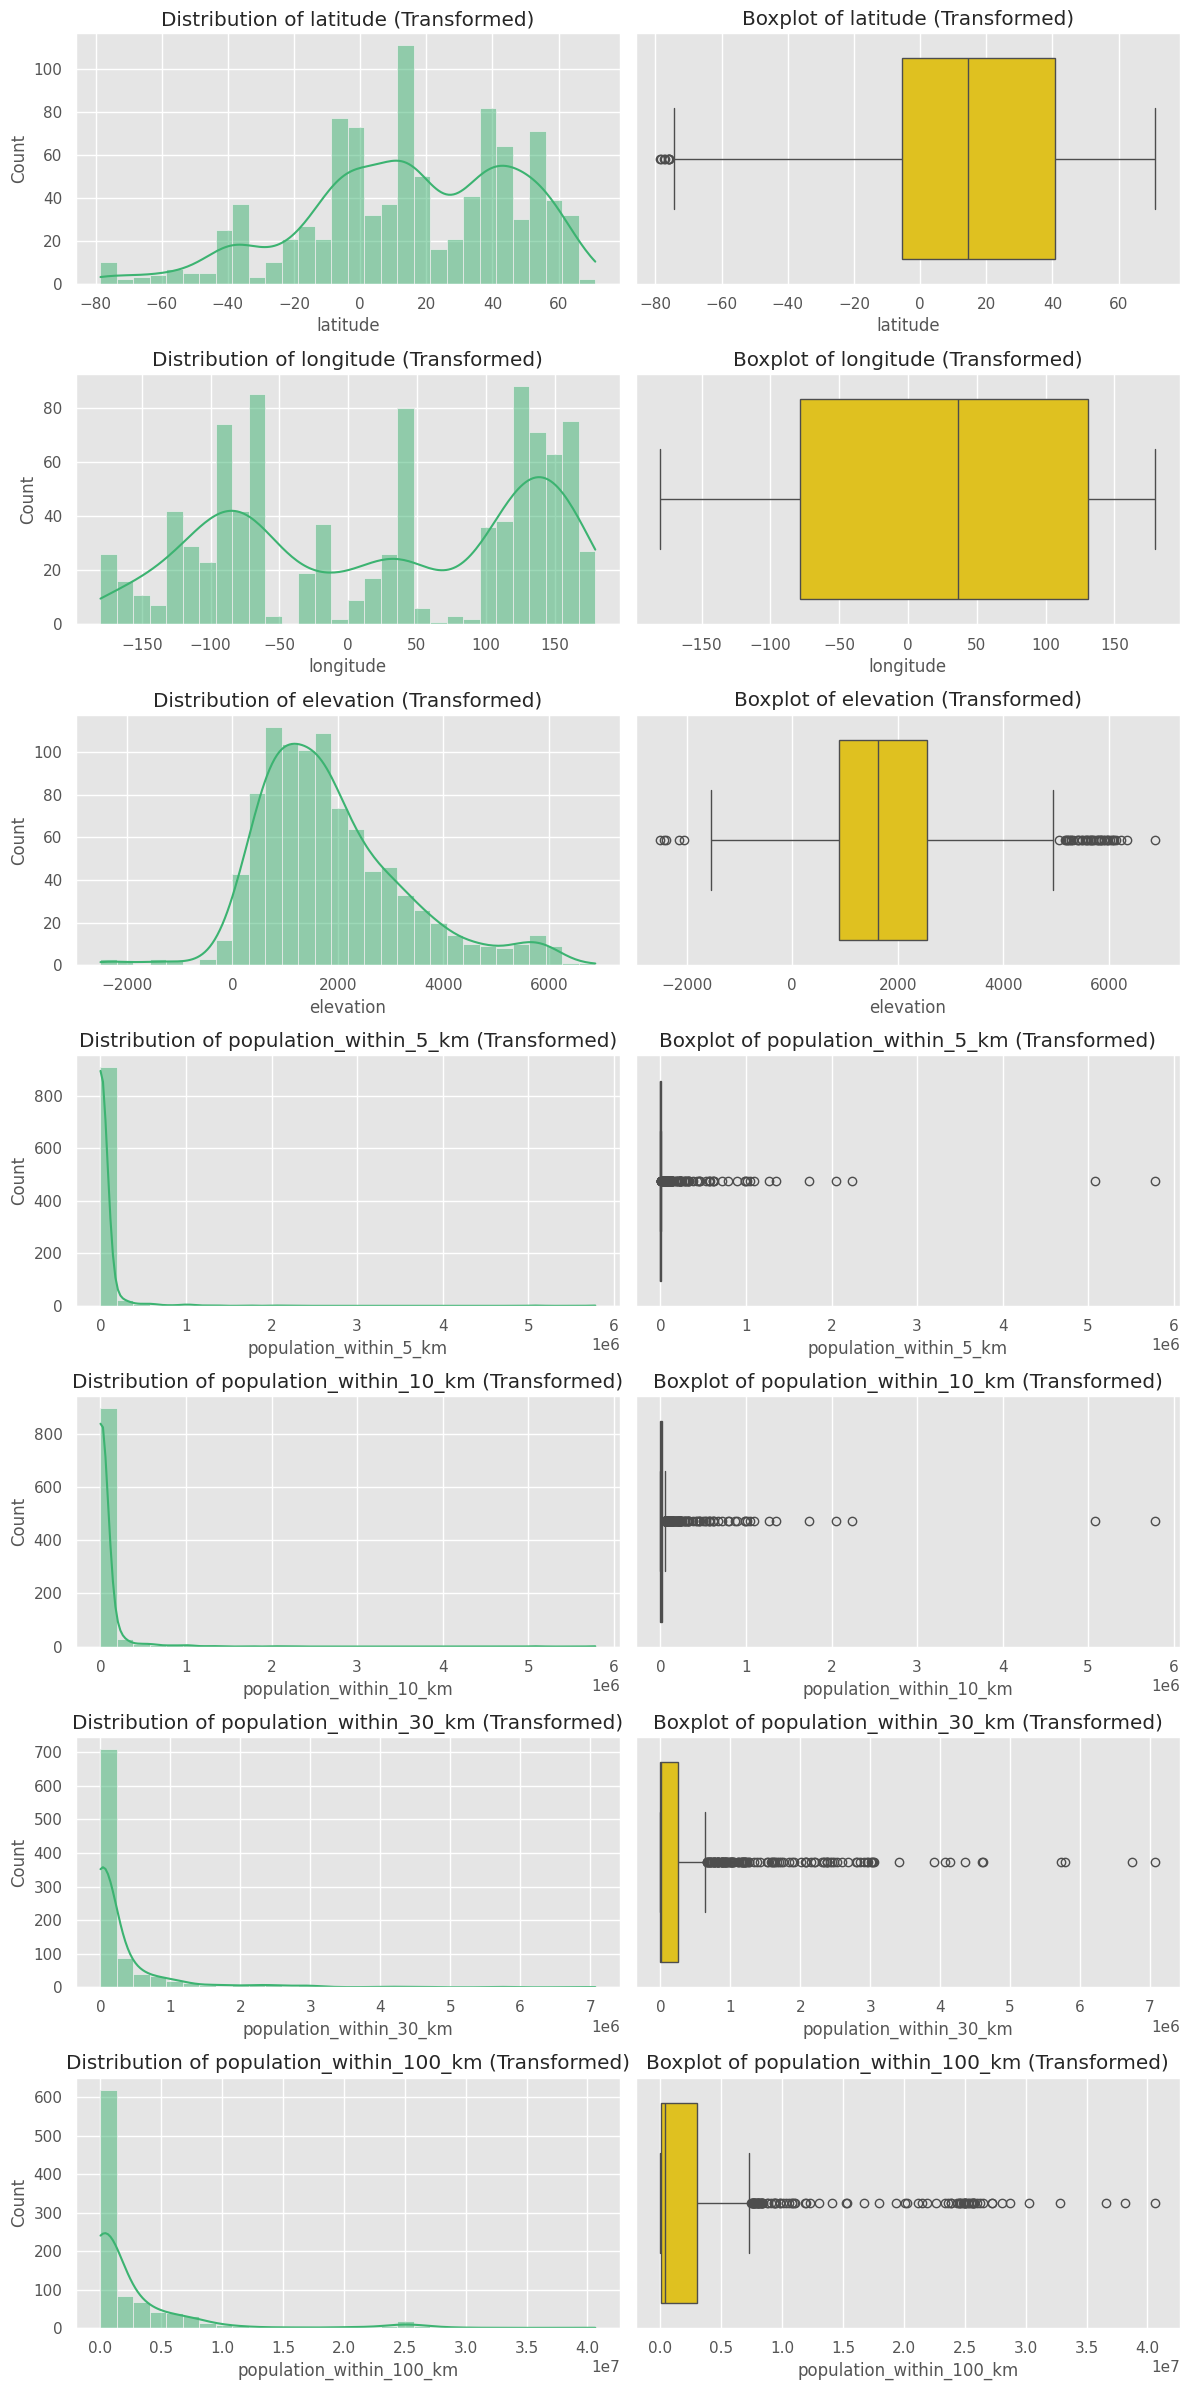

In [89]:
fig, axs = plt.subplots(7, 2, figsize=(12, 24))
columns = df_kmeans.columns

for i, col in enumerate(columns):
    # Distribution Plot
    sns.histplot(df_kmeans[col], kde=True, ax=axs[i, 0], bins=30, color='mediumseagreen')
    axs[i, 0].set_title(f'Distribution of {col} (Transformed)')

    # Box Plot
    sns.boxplot(x=df_kmeans[col], ax=axs[i, 1], color='gold')
    axs[i, 1].set_title(f'Boxplot of {col} (Transformed)')

plt.tight_layout()
plt.show()

**Log Transformation and Feature Scaling**

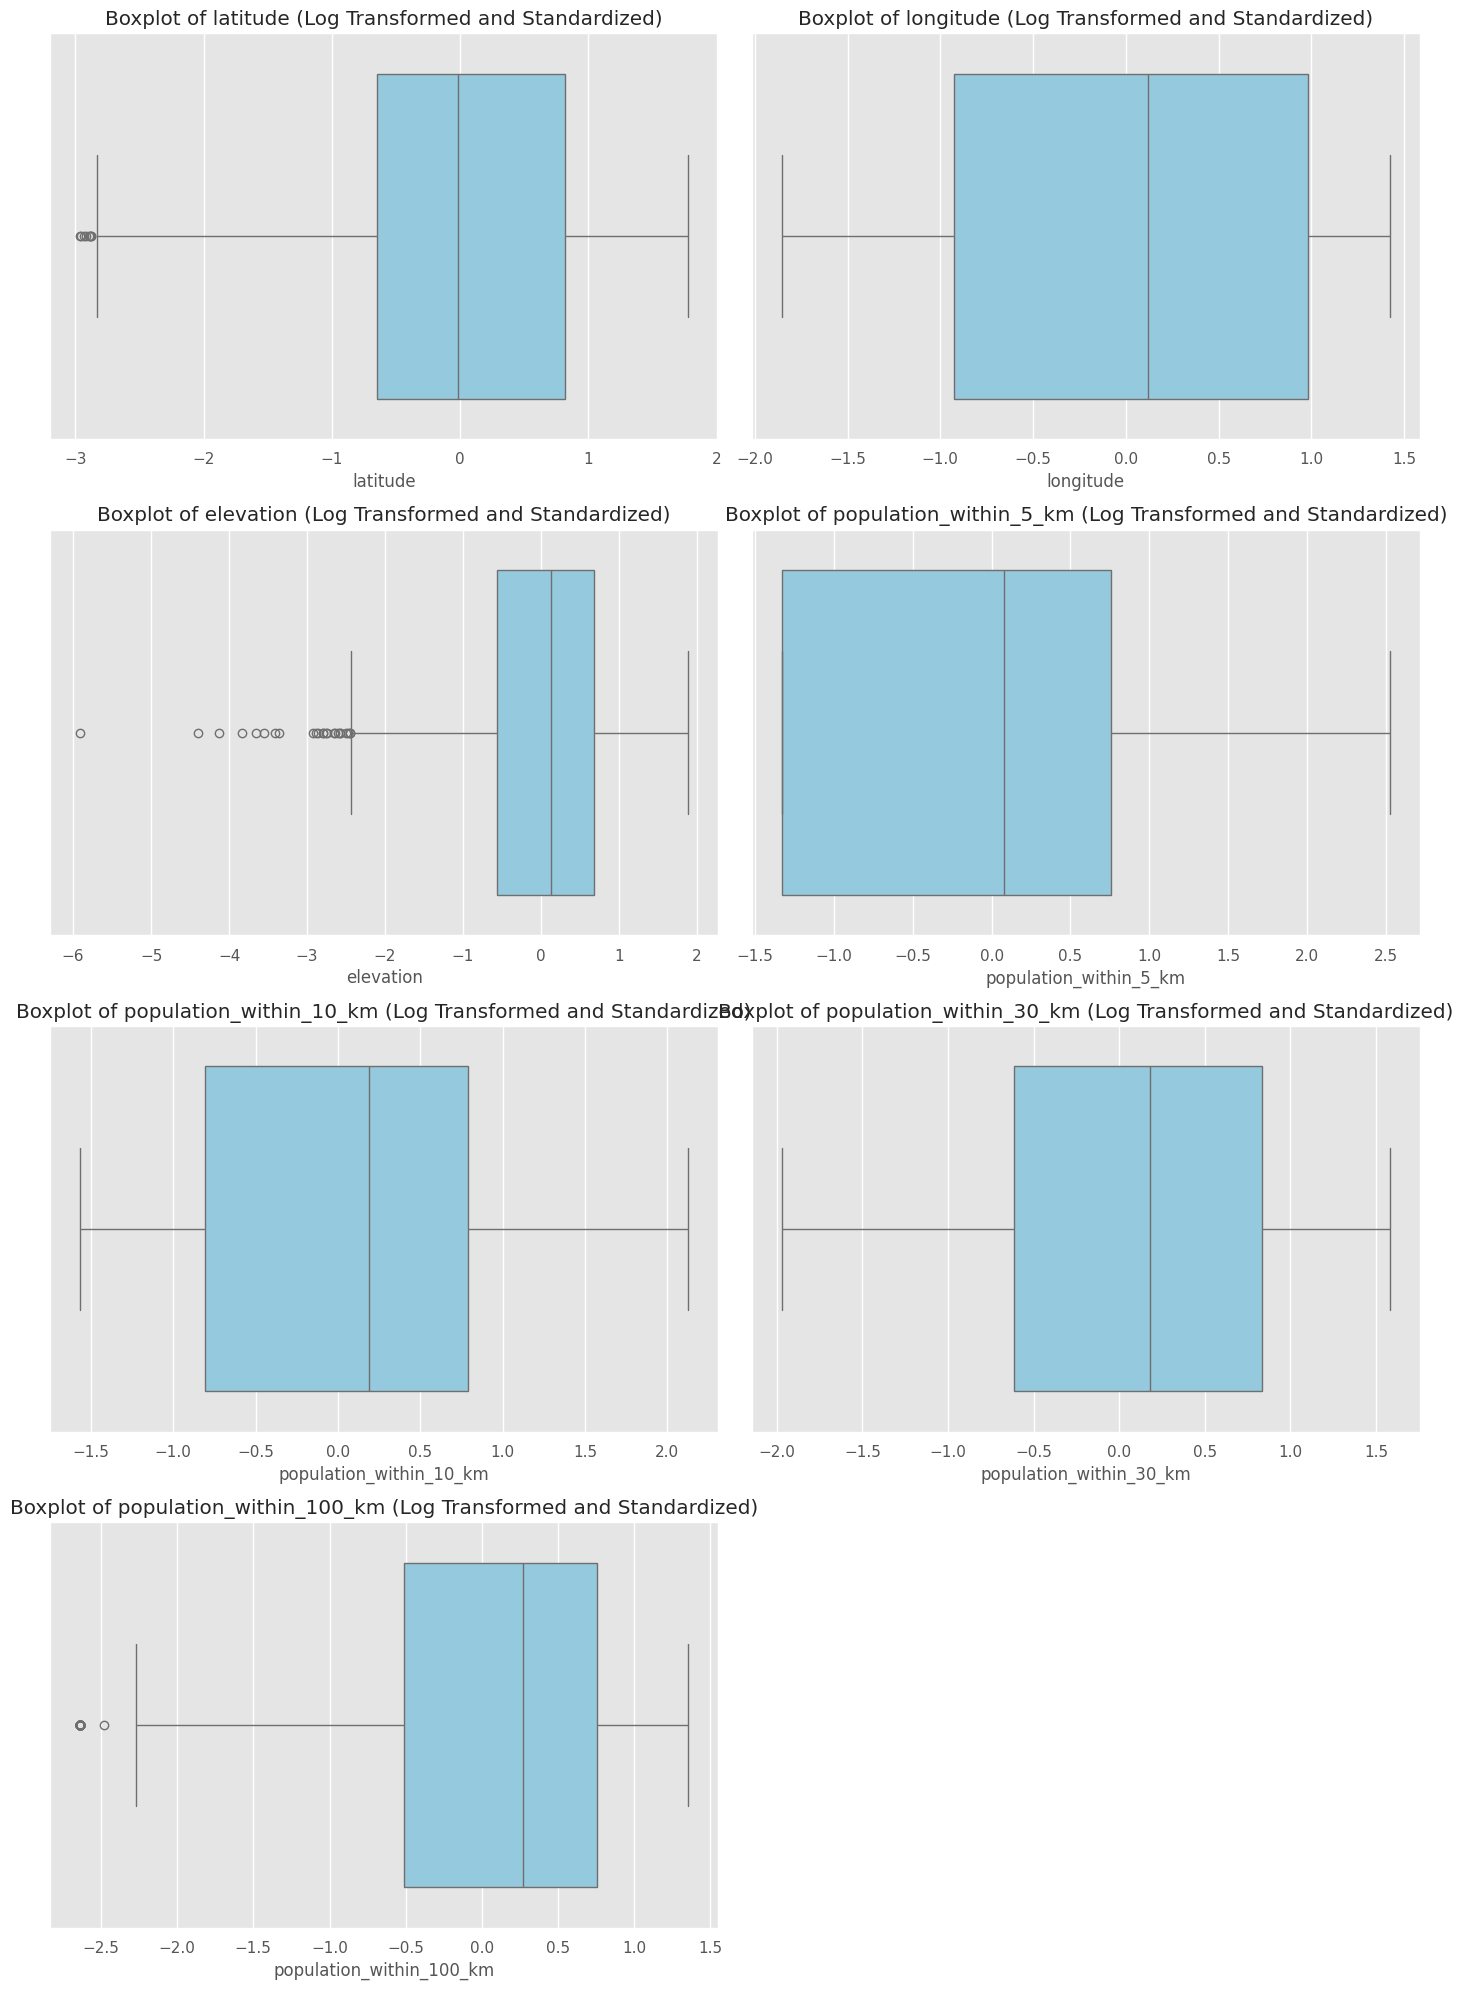

In [90]:
# Columns to use
selected_cols = ['latitude', 'longitude', 'elevation', 'population_within_5_km', 'population_within_10_km', 'population_within_30_km', 'population_within_100_km']

# Apply log1p to skewed columns
df_kmeans_transformed = df_kmeans.copy()
log_cols = ['elevation', 'population_within_5_km', 'population_within_10_km', 'population_within_30_km', 'population_within_100_km']
df_kmeans_transformed[log_cols] = df_kmeans_transformed[log_cols].apply(np.log1p)

# Standardize all selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_kmeans_transformed[selected_cols])
df_kmeans_scaled = pd.DataFrame(X_scaled, columns=selected_cols)

# Plot boxplots
plt.figure(figsize=(14, 20))
for i, col in enumerate(df_kmeans_scaled.columns):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df_kmeans_scaled[col], color='skyblue')
    plt.title(f'Boxplot of {col} (Log Transformed and Standardized)')
    plt.tight_layout()

plt.show()

**Outlier Handling (Winsorization)**

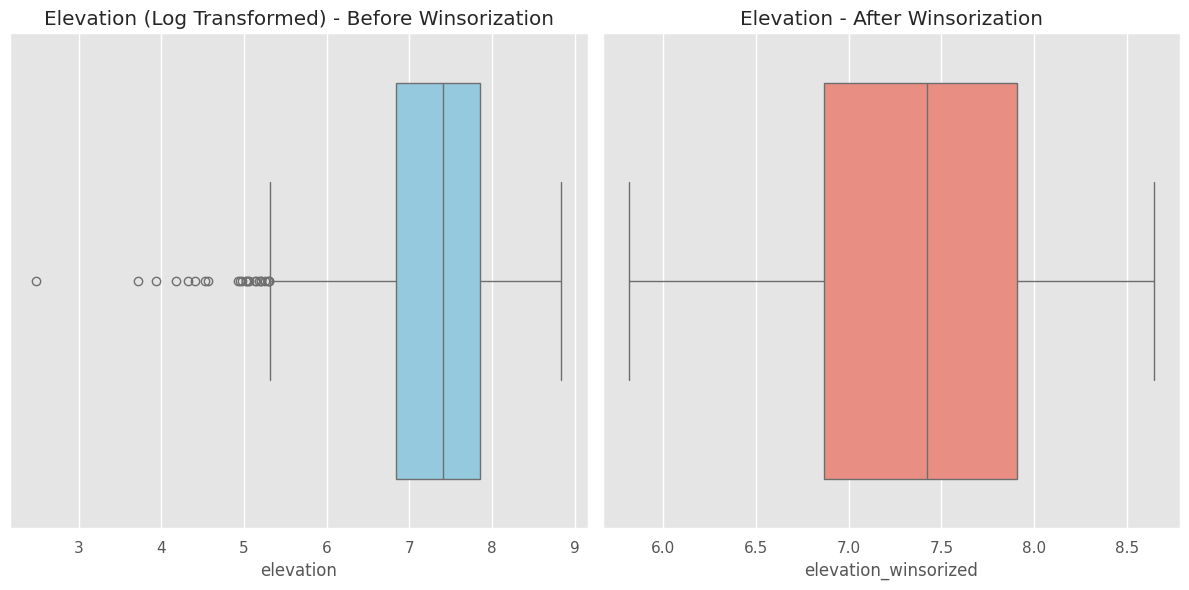

In [91]:
from scipy.stats.mstats import winsorize
# Winsorize 'elevation' column (log transformed)
df_kmeans_transformed['elevation_winsorized'] = winsorize(df_kmeans_transformed['elevation'], limits=[0.05, 0.05])

# Plot boxplot before and after winsorization side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_kmeans_transformed['elevation'], color='skyblue')
plt.title('Elevation (Log Transformed) - Before Winsorization')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_kmeans_transformed['elevation_winsorized'], color='salmon')
plt.title('Elevation - After Winsorization')

plt.tight_layout()
plt.show()



In [92]:
df_kmeans_transformed['elevation'] = df_kmeans_transformed['elevation_winsorized']
df_kmeans_transformed.drop(columns=['elevation_winsorized'], inplace=True)
v_data = df_kmeans_transformed



**final dataframe**

In [93]:
v_data

,latitude,longitude,elevation,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
0,34.500,131.600,6.464588,8.188133,9.168997,11.676794,15.219437
1,-23.292,-67.618,8.643121,0.000000,2.079442,5.686975,9.115260
2,14.501,-90.876,8.288283,8.373323,11.014210,13.857455,15.848225
3,38.537,34.621,7.428927,11.758722,11.758722,12.294404,14.627988
4,46.206,-121.490,8.227643,0.000000,4.262680,8.299037,12.882338
...,...,...,...,...,...,...,...
953,55.862,160.603,8.025516,0.000000,0.000000,4.356709,9.322329
954,19.400,-100.250,8.160804,12.354398,12.354398,13.103060,15.392026
955,15.050,42.180,5.817111,2.079442,2.079442,2.079442,13.416781
956,14.020,42.750,6.437752,6.232448,6.827629,6.981006,14.202677


# **visualize dataset**
**PCA for 2D view.**

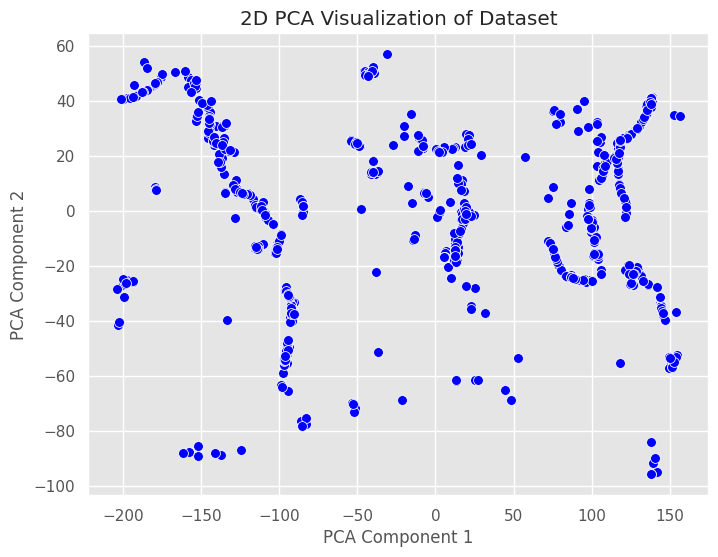

In [94]:

# Extract features for clustering
X = v_data[selected_cols]

# Perform PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], s=50, color='blue')
plt.title('2D PCA Visualization of Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# **Clustering – KMeans Fit**
1. **Applied KMeans with k=3 initially and assigned cluster labels to each volcano**
2. **visualizing with PCA for 2D view.**

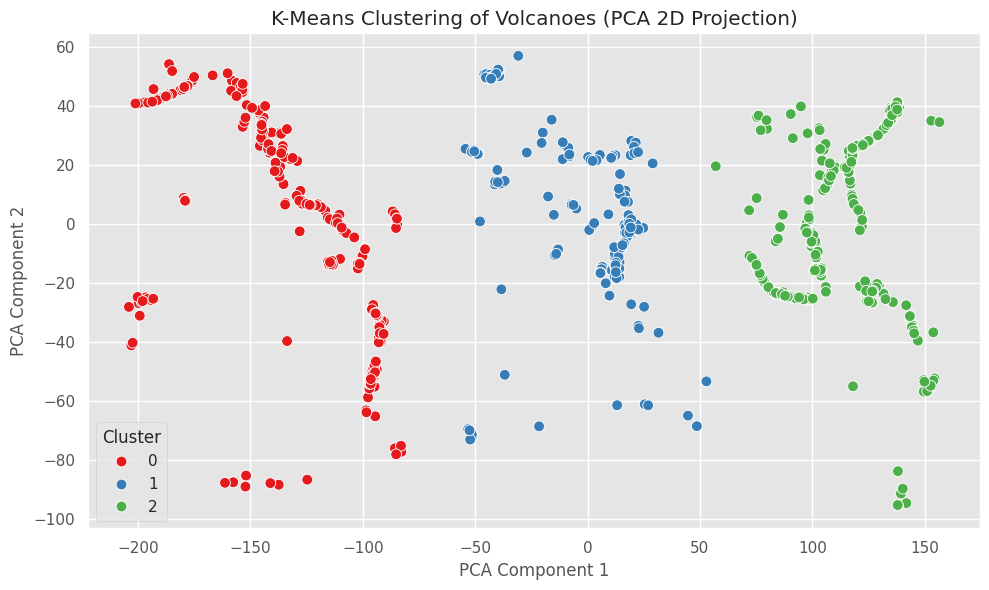

In [95]:
# Fit KMeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
v_data['cluster'] = kmeans.fit_predict(v_data)
#PCA for 2D visualization (only on features, not cluster)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(v_data)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=v_data['cluster'], palette='Set1', s=60)
plt.title('K-Means Clustering of Volcanoes (PCA 2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


**silhouette score for K=3**

In [96]:


# Evaluate Silhouette Score using all features (excluding 'cluster')
score = silhouette_score(v_data.drop(columns=['cluster']), v_data['cluster'])
print(f"Silhouette Score for k=3: {score:.4f}")


Silhouette Score for k=3: 0.5795


# **Elbow Method:**
**Plotted Inertia vs. K to find the optimal number of clusters**.

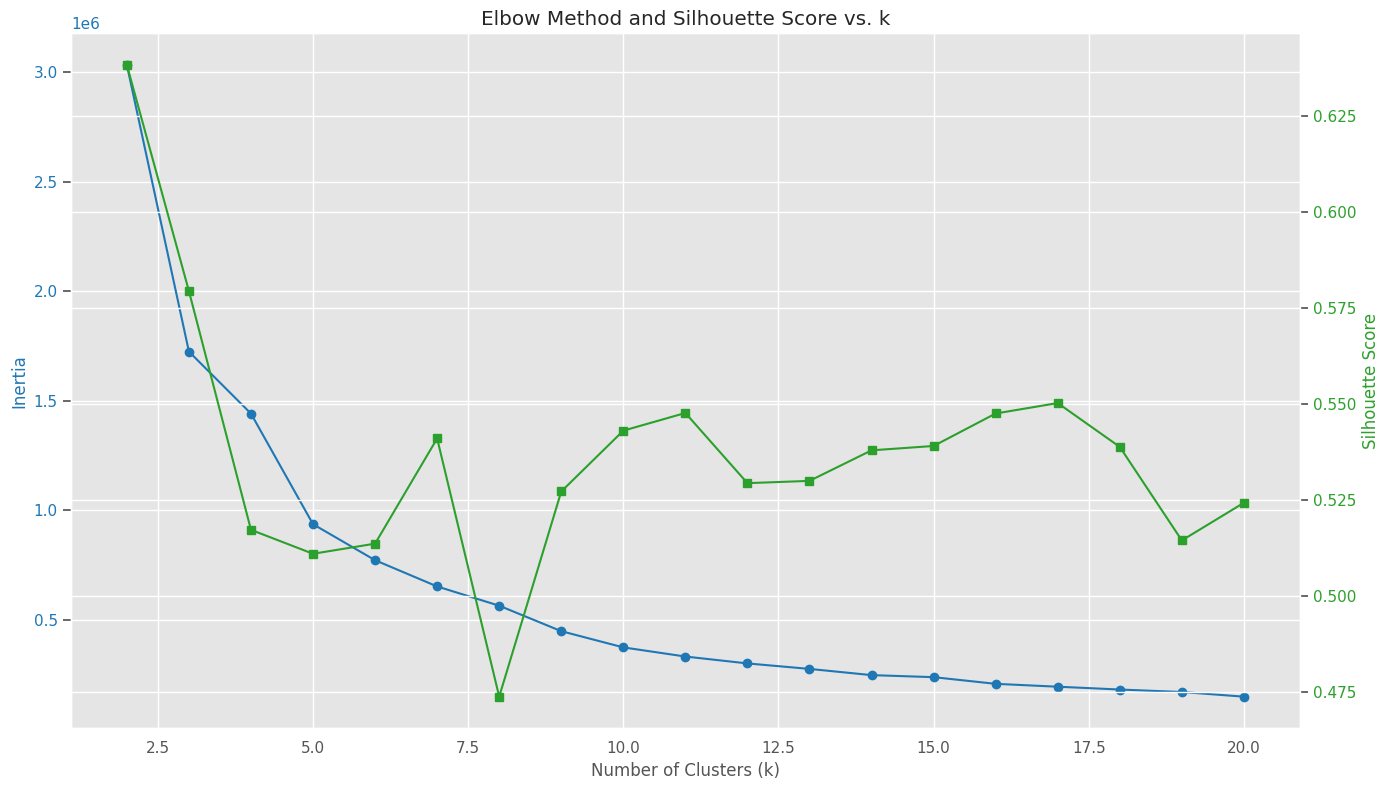

In [97]:

inertias = []
silhouette_scores = []
k_range = range(2, 21)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(v_data.drop(columns=['cluster'], errors='ignore'))
    inertias.append(kmeans.inertia_)
    score = silhouette_score(v_data.drop(columns=['cluster'], errors='ignore'), labels)
    silhouette_scores.append(score)

# Plot both metrics
fig, ax1 = plt.subplots(figsize=(14, 8))

# Inertia (Elbow Curve)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color='tab:blue')
ax1.plot(k_range, inertias, marker='o', label='Inertia', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Silhouette Score (Secondary Axis)
ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:green')
ax2.plot(k_range, silhouette_scores, marker='s', label='Silhouette Score', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Titles and layout
plt.title('Elbow Method and Silhouette Score vs. k')
fig.tight_layout()
plt.grid(True)
plt.show()



**Silhouette Score:**

**Evaluated the quality of clustering. The best silhouette score was around 0.64 for K=2.**

# **final Visualization**
* **visualizing with PCA for 2D view.**
* **Final Silhouette Score**

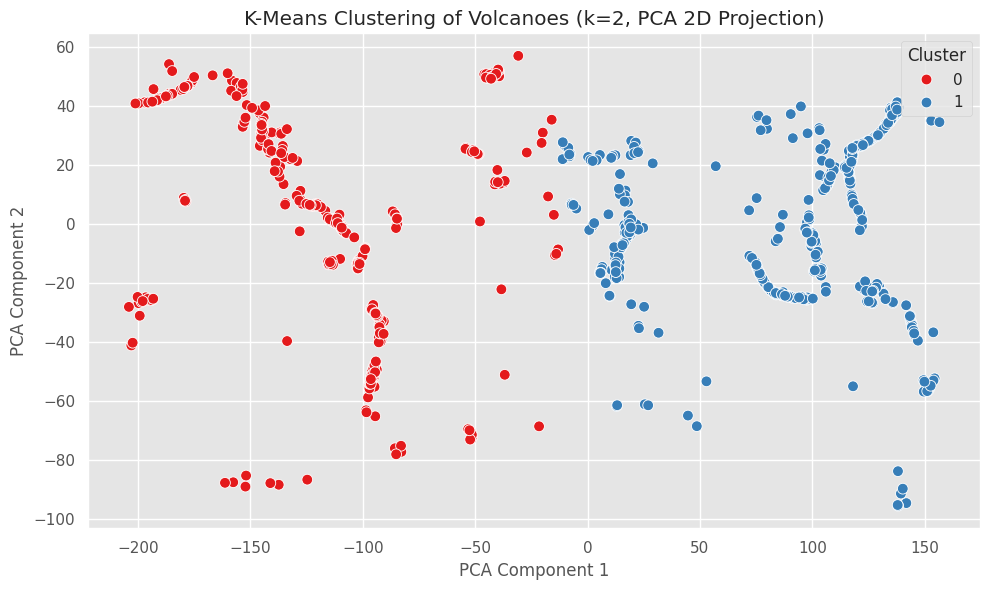

Silhouette Score for k=2: 0.6384


In [98]:
# Refit KMeans with optimal k=11
k = 2
kmeans_opt = KMeans(n_clusters=k, random_state=42)
v_data['cluster'] = kmeans_opt.fit_predict(v_data)

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(v_data.drop(columns=['cluster']))

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=v_data['cluster'], palette='Set1', s=60)
plt.title('K-Means Clustering of Volcanoes (k=2, PCA 2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()
# Evaluate Silhouette Score using all features (excluding 'cluster')
score = silhouette_score(v_data.drop(columns=['cluster']), v_data['cluster'])
print(f"Silhouette Score for k=2: {score:.4f}")

**visualizing with PCA for 3D view.**

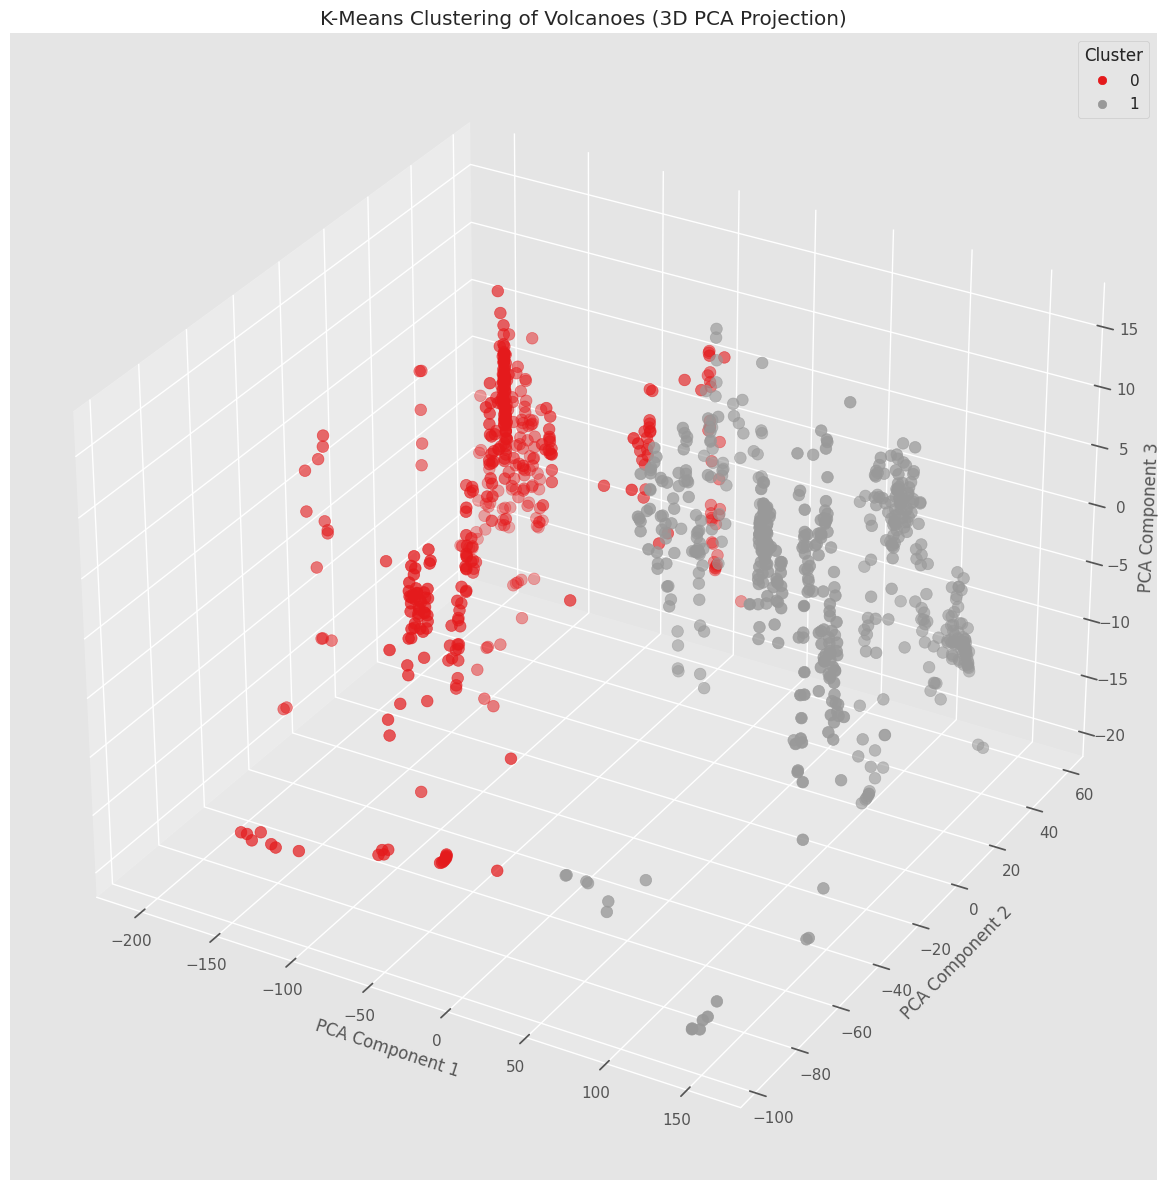

In [103]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# 3D PCA (reduce to 3 components)
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(v_data.drop(columns=['cluster']))

# Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded clusters
scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=v_data['cluster'], cmap='Set1', s=70
)

# Axes labels
ax.set_title('K-Means Clustering of Volcanoes (3D PCA Projection)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Legend
legend = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend)

plt.tight_layout()
plt.show()


# **Final Processed Data (v_data):**
**This is the final DataFrame that includes:**

* All log-transformed, winsorized, and standardized features

* A cluster column representing KMeans labels

* PCA components (for plotting only)
It’s ready for interpretation, labeling, or supervised modeling if needed later.